<a href="https://colab.research.google.com/github/Shreyas-Bhat/Intro-to-ml-dl/blob/main/Week3/KNNs_and_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
iris_df = sns.load_dataset("iris")

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# there are 3 labels setosa, versicolor, virginica and we have 4 features which describe the shape of the flower

In [ ]:
iris_df.species.value_counts() # alternative iris_df["species"].value_counts or pd.value_counts(iris_df["species"]) 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# so the data is balanced 

In [ ]:
#any nan/ missing values? --> no 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


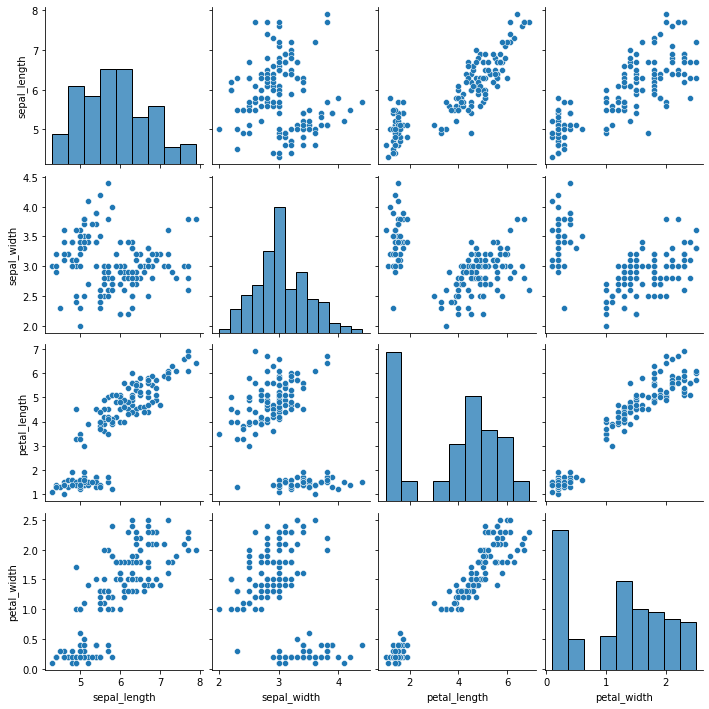

In [ ]:
sns.pairplot(iris_df)

In [ ]:
# okay but we can make this pairplot more informative by adding hue parameter . 

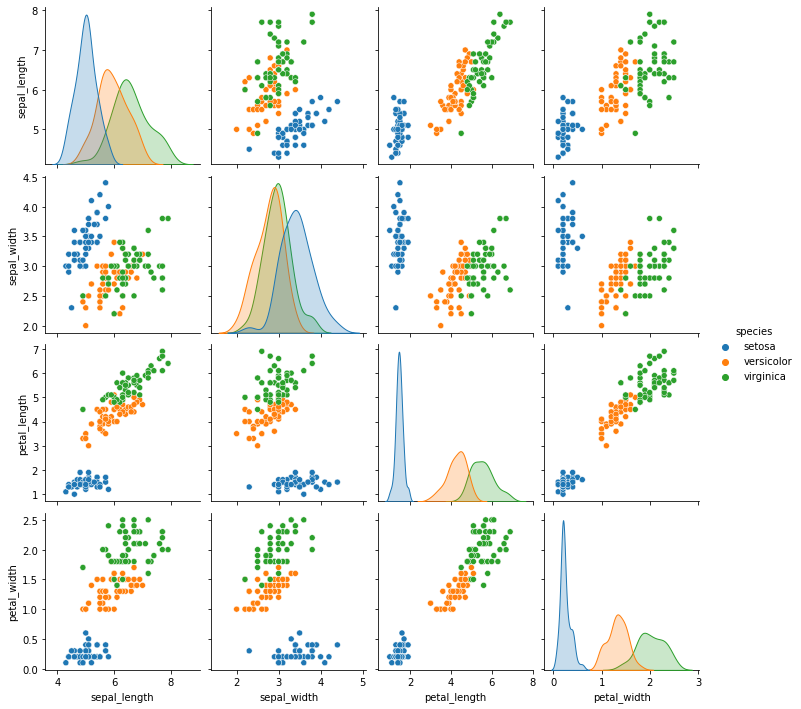

In [ ]:
sns.pairplot(iris_df, hue="species", )

In [ ]:
#we can see here that the blue coloured datapoints have very different distribution than the orange and green coloured distribution.

#we can clearly identify the setosa if we are provided with the petal_length of the flower. (all the flowers with petal lenth less than 2.5 are of setosa.)

In [ ]:
#oka, but can we create some additional features from given datapoints? lets try, how about ratio of the sepal_length and width? 

In [ ]:
iris_df["sepal_ratio"] = iris_df["sepal_length"] / iris_df["sepal_width"]
iris_df["petal_ratio"] = iris_df["petal_length"] / iris_df["petal_width"]

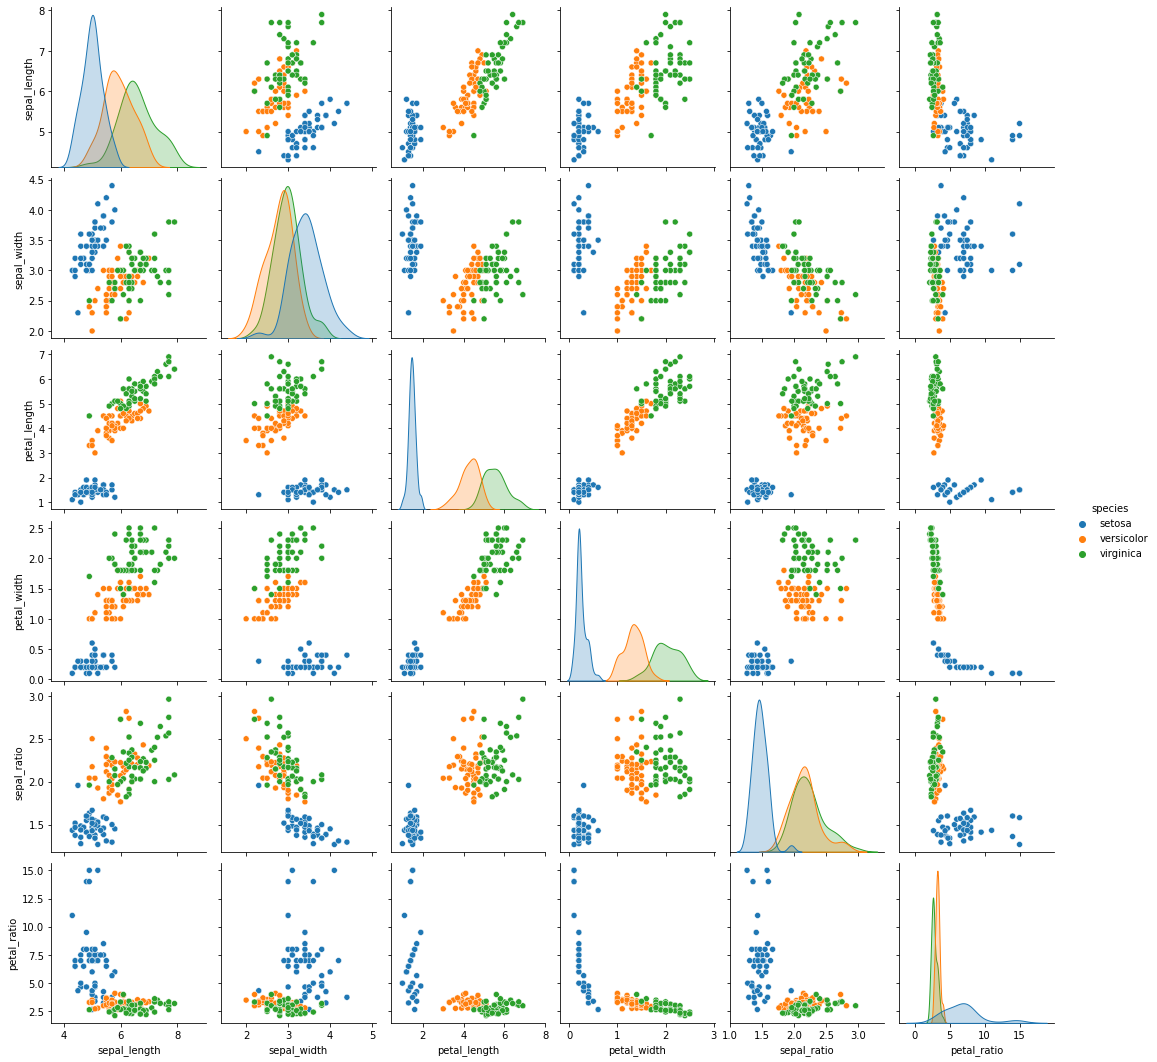

In [ ]:
sns.pairplot(iris_df, hue="species", ) # we can try for other such operations, maybe take ratio of lengths only , take difference of lenth, 



In [ ]:
iris_df["lenth_ratio"] = iris_df["sepal_length"] /iris_df["petal_length"] 
iris_df["width_ratio"] = iris_df["sepal_width"] / iris_df["petal_width"]
iris_df.drop(["sepal_ratio", "petal_ratio"], axis=1, inplace=True)

In [ ]:
iris_df[iris_df.species=='setosa']["petal_length"].max() 

1.9

In [ ]:
iris_df[iris_df.species == "versicolor"]["petal_length"].min()

3.0

In [ ]:
iris_df[iris_df.species == "virginica"]["petal_length"].min() 

4.5

In [ ]:
#so classifying if the given datapoint is of type `setosa` or not will be easier as do have prior knowledge about the distribution of the `setosa` class. 
#But the distribution of other two classes is very similar. lets just print pairplot of only these two classes. 


In [ ]:
iris_without_setosa = iris_df[iris_df.species != "setosa"]

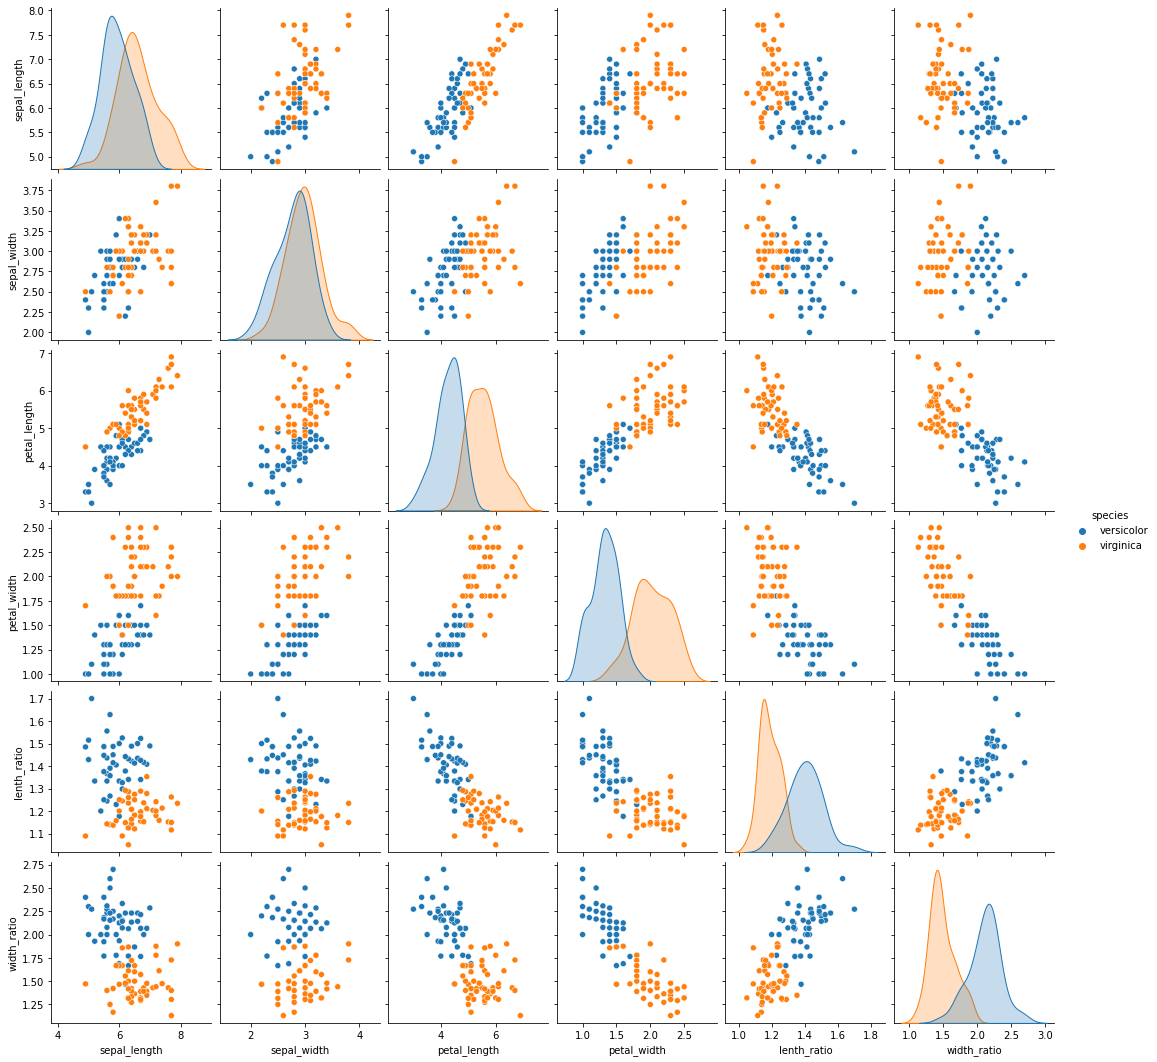

In [ ]:
sns.pairplot(iris_without_setosa, hue="species")

In [ ]:
from sklearn.model_selection import train_test_split 


X = iris_df.drop("species", axis=1)
y= iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)


In [ ]:
y_test

128     virginica
11         setosa
118     virginica
15         setosa
123     virginica
135     virginica
32         setosa
1          setosa
116     virginica
45         setosa
40         setosa
115     virginica
26         setosa
28         setosa
145     virginica
97     versicolor
62     versicolor
77     versicolor
122     virginica
112     virginica
125     virginica
31         setosa
146     virginica
29         setosa
69     versicolor
149     virginica
75     versicolor
20         setosa
73     versicolor
120     virginica
81     versicolor
99     versicolor
119     virginica
12         setosa
16         setosa
51     versicolor
46         setosa
89     versicolor
136     virginica
114     virginica
41         setosa
90     versicolor
102     virginica
109     virginica
37         setosa
Name: species, dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)

0.9777777777777777

In [ ]:
results = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
mtrx=confusion_matrix(results,y_test)
mtrx=pd.DataFrame(mtrx, index = "setosa versicolor virginica".split(), columns = "setosa versicolor virginica".split() )

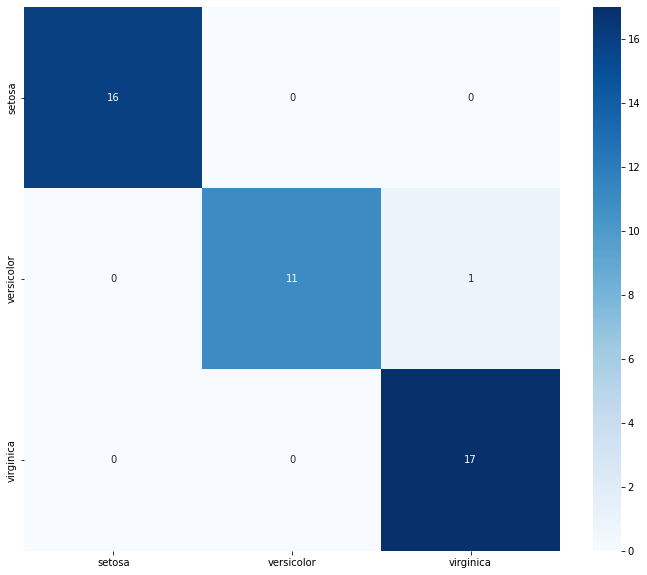

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(mtrx,cmap="Blues",annot=True,fmt="g", ) #this is a confusion matrix

In [ ]:
#yey 

In [ ]:
#HW - read about metrics like F1 score, precision, recall. 
# these are metrics used for evaluation of the model. 

In [ ]:
# okay so we took n_neighbours = 5 and we got score of around 97%, but can we do better? we should search for best value of nearest_neghbours, right? lets do that only. 

In [ ]:
n_neighbours_list = list(range(1,25))
n_neighbours_dict = {"n_neighbors" : n_neighbours_list} # converting this to dict as GridSearchCV needs the search parameters in this form.

In [ ]:
# we will be using grid search from sklearn library, read more about it here - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

In [ ]:
search_grid = GridSearchCV(knn, n_neighbours_dict, cv=5, scoring='accuracy')

In [ ]:
search_grid.fit(iris_df.drop('species', axis=1), iris_df.species) # training split and testing split is taken care bt GridsearchCV

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy')

In [ ]:
search_grid.cv_results_

{'mean_fit_time': array([0.00309515, 0.00233235, 0.00244927, 0.00231948, 0.00238209,
        0.0024045 , 0.00236702, 0.00312991, 0.00292783, 0.0029912 ,
        0.00255256, 0.00278287, 0.003054  , 0.00242229, 0.00238333,
        0.00238247, 0.00244489, 0.00243502, 0.00246921, 0.00248113,
        0.00236936, 0.00236306, 0.00264711, 0.0024013 ]),
 'mean_score_time': array([0.0037528 , 0.00330439, 0.00367761, 0.003264  , 0.00327234,
        0.00333066, 0.00330114, 0.00583377, 0.00625477, 0.00586619,
        0.00361319, 0.00389843, 0.00438638, 0.00341544, 0.00338812,
        0.00338588, 0.00430837, 0.00339613, 0.0034121 , 0.00346079,
        0.00340433, 0.00337639, 0.00441327, 0.00337868]),
 'mean_test_score': array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96      ,
        0.98      , 0.97333333, 0.97333333, 0.98      , 0.97333333,
        0.97333333, 0.96666667, 0.96      , 0.95333333, 0.95333333,
        0.96      , 0.96      , 0.96      , 0.96      , 0.96      ,
        0.96 

In [ ]:
search_results = pd.DataFrame(search_grid.cv_results_)

In [ ]:
search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003095,0.000981,0.003753,0.000997,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.000000,0.960000,0.024944,17
1,0.002332,0.000019,0.003304,0.000013,2,{'n_neighbors': 2},0.966667,0.933333,0.966667,0.900000,1.000000,0.953333,0.033993,20
2,0.002449,0.000190,0.003678,0.000669,3,{'n_neighbors': 3},1.000000,0.966667,0.933333,0.933333,1.000000,0.966667,0.029814,7
3,0.002319,0.000017,0.003264,0.000065,4,{'n_neighbors': 4},0.966667,0.966667,1.000000,0.933333,0.966667,0.966667,0.021082,7
4,0.002382,0.000042,0.003272,0.000055,5,{'n_neighbors': 5},0.966667,0.966667,0.933333,0.933333,1.000000,0.960000,0.024944,17


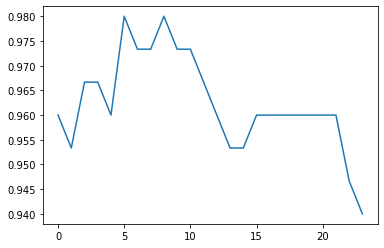

In [ ]:
plt.plot(search_results.mean_test_score)

In [ ]:
search_results.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.002404,0.000121,0.003331,0.000159,6,{'n_neighbors': 6},0.966667,1.000000,1.000000,0.933333,1.000000,0.980000,0.026667,1
8,0.002928,0.000046,0.006255,0.000554,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,1
6,0.002367,0.000038,0.003301,0.000036,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.933333,1.000000,0.973333,0.024944,3
7,0.003130,0.000595,0.005834,0.001324,8,{'n_neighbors': 8},0.966667,1.000000,0.966667,0.933333,1.000000,0.973333,0.024944,3
9,0.002991,0.000128,0.005866,0.000209,10,{'n_neighbors': 10},0.966667,1.000000,0.966667,0.933333,1.000000,0.973333,0.024944,3
10,0.002553,0.000255,0.003613,0.000522,11,{'n_neighbors': 11},0.966667,1.000000,0.933333,0.966667,1.000000,0.973333,0.024944,3
11,0.002783,0.000459,0.003898,0.000884,12,{'n_neighbors': 12},0.966667,1.000000,0.933333,0.933333,1.000000,0.966667,0.029814,7
2,0.002449,0.000190,0.003678,0.000669,3,{'n_neighbors': 3},1.000000,0.966667,0.933333,0.933333,1.000000,0.966667,0.029814,7
3,0.002319,0.000017,0.003264,0.000065,4,{'n_neighbors': 4},0.966667,0.966667,1.000000,0.933333,0.966667,0.966667,0.021082,7
21,0.002363,0.000020,0.003376,0.000027,22,{'n_neighbors': 22},0.966667,1.000000,0.933333,0.933333,0.966667,0.960000,0.024944,10


In [ ]:
#Descision tree

In [ ]:
!wget https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv


--2022-05-30 17:57:20--  https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419 [text/plain]
Saving to: ‘PlayTennis.csv’

PlayTennis.csv      100%[===================>]     419  --.-KB/s    in 0s      

2022-05-30 17:57:20 (18.4 MB/s) - ‘PlayTennis.csv’ saved [419/419]



In [ ]:
playtennis_df = pd.read_csv("PlayTennis.csv")

In [ ]:
playtennis_df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
df1 = playtennis_df[["Outlook","Play Tennis"]]
df1 

,Outlook,Play Tennis
0,Sunny,No
1,Sunny,No
2,Overcast,Yes
3,Rain,Yes
4,Rain,Yes
5,Rain,No
6,Overcast,Yes
7,Sunny,No
8,Sunny,Yes
9,Rain,Yes


In [ ]:
df2 = playtennis_df[["Temperature","Play Tennis"]]
df2

,Temperature,Play Tennis
0,Hot,No
1,Hot,No
2,Hot,Yes
3,Mild,Yes
4,Cool,Yes
5,Cool,No
6,Cool,Yes
7,Mild,No
8,Cool,Yes
9,Mild,Yes


In [ ]:
df1 

""""
sunny yes 2
sunny no  3 

gini for sunny = 1 - (2/5)**2 - (3/5)**2 = 0.48

Overcast no 0
Overcast yes 4 

gini for overcast = 1 - 0**2 - (4/4)**2 =0

Rain no 2
Rain yes 3

gini for rain = same as gini for sunny = 0.48

overall gini will be weighted average = 5/(14) * 0.48 *2  =0.34
"""


'"\nsunny yes 2\nsunny no  3 \n\ngini for sunny = 1 - (2/5)**2 - (3/5)**2 = 0.48\n\nOvercast no 0\nOvercast yes 4 \n\ngini for overcast = 1 - 0**2 - (4/4)**2 =0\n\nRain no 2\nRain yes 3\n\ngini for rain = same as gini for sunny = 0.48\n\noverall gini will be weighted average = 5/(14) * 0.48 *2  =0.34\n'

In [ ]:
df2 

"""
Hot no 2
Hot yes 2 

gini for hot = 1 - (0.5)**2 - (0.5)**2 = 0.5

Mild no 2
Mild yes 4

gini for mild = 1 - (1/3)**2 - (2/3)**2 = 0.444


cool no 1
cool yes 3

gini for cool = 1 - (1/4)**2 -(3/4)**2 = 0.37

overall gini impurity will be weighted average of above all = 4/14 * 0.5 + 6/14 *0.444 + 4/14*0.37 =0.43
"""

# as gini impurity for outlook column is lesser compared to the gini of temperature column, we will prefer outlook as our first node. 
#same thing will be repeated for the root nodes.

'\nHot no 2\nHot yes 2 \n\ngini for hot = 1 - (0.5)**2 - (0.5)**2 = 0.5\n\nMild no 2\nMild yes 4\n\ngini for mild = 1 - (1/3)**2 - (2/3)**2 = 0.444\n\n\ncool no 1\ncool yes 3\n\ngini for cool = 1 - (1/4)**2 -(3/4)**2 = 0.37\n\noverall gini impurity will be weighted average of above all = 4/14 * 0.5 + 6/14 *0.444 + 4/14*0.37 =0.43\n'

In [ ]:
#but there is disadvantage of using discision trees; they eassily overfit the data and cant be generalised, hence we either have to prune the trees or we have to use the random forests method.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtmodel = DecisionTreeClassifier(random_state=100)
model = dtmodel.fit(X_train, y_train)

In [ ]:
dtmodel.score(X_test, y_test)

0.9555555555555556

In [ ]:
# 
from sklearn import tree

[Text(0.3333333333333333, 0.9, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.4444444444444444, 0.7, 'X[3] <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(0.2222222222222222, 0.5, 'X[2] <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3333333333333333, 0.3, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6666666666666666, 0.5, 'X[5] <= 1.753\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]'),
 Text(0.7777777777777778, 0.3, 'X[3] <= 1.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.6666666666666666, 0.1, 

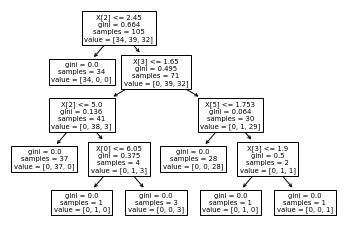

In [ ]:
tree.plot_tree(dtmodel)